In [1]:
import numpy as np
import pandas as pd

In [2]:
from plotly import __version__

In [3]:
import plotly.express as px

In [4]:
import plotly.graph_objects as go

In [5]:
import cufflinks as cf

In [6]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [7]:
init_notebook_mode(connected=True)

In [8]:
cf.go_offline()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_html('https://www.mohfw.gov.in/')
#initially this site has two columns such as Indian National Cases and Foreign National cases But it changed to Total confirmed cases

In [11]:
df[9]

,S. No.,Name of State / UT,Total Confirmed cases *,Cured/Discharged/Migrated,Death
0,1,Andhra Pradesh,19,1,0
1,2,Andaman and Nicobar Islands,9,0,0
2,3,Bihar,11,0,1
3,4,Chandigarh,8,0,0
4,5,Chhattisgarh,7,0,0
5,6,Delhi,53,6,2
6,7,Goa,5,0,0
7,8,Gujarat,58,1,5
8,9,Haryana,33,17,0
9,10,Himachal Pradesh,3,0,1


In [1]:
#To Drop s.no column and last two rows
df[9].drop('S. No.',axis=1, inplace=True)
df[9].drop([28],axis=0, inplace=True)

#Renaming the columns for easy Accessibility:
cols= ['States','Indian Confirmed cases','Foreign National Confirmed cases','Cured','Death']
df[9].columns=cols
#columns are over-written with the new set of column names for accessibility


In [13]:
#Type casting from object to int64
df[9]['Cured']=df[9]['Cured'].astype(str).astype(int)
df[9]['Indian Confirmed cases']=df[9]['Indian Confirmed cases'].astype(str).astype(int)
df[9]['Foreign National Confirmed cases']=df[9]['Foreign National Confirmed cases'].astype(str).astype(int)
df[9]['Death']=df[9]['Death'].astype(str).astype(int)

In [17]:
#State Wise Indian and Foreign National Cases:
fig = go.Figure(data=[
    go.Bar(name='Indian Confirmed Cases', x=df[9]['States'], y=df[9]['Indian Confirmed cases']),
    go.Bar(name='Foreign National Cases', x=df[9]['States'], y=df[9]['Foreign National Confirmed cases'])
])
fig.update_layout(barmode='stack')
fig.show()

In [18]:
#Total cases in a state is Sum of Indian and Foreign victims of that state
total_cases=[]
def total_sum(a,b):
    sum=0
    for i in range(len(a)):
        sum=int(a[i])+int(b[i])
        total_cases.append(sum)
total_sum(df[9]['Indian Confirmed cases'],df[9]['Foreign National Confirmed cases'])
#The data is now in the list, convert it into series

pandas.core.series.Series

In [19]:
# Cured and Deaths on a same graph #
#method1: Dataframe -- selected columns
df[9][['Cured','Death']].iplot(kind='spread')
#method 2: New dataframe with only selected elements
#df_cd = pd.DataFrame(pd.read_excel('india.xlsx'), columns = ['Cured', 'Death'])

c:\users\ramwsh\appdata\local\programs\python\python38-32\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

c:\users\ramwsh\appdata\local\programs\python\python38-32\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [254]:
#We have now got the sum of National and Foreign Cases, That sum has to be passed as the column in the heatmap.

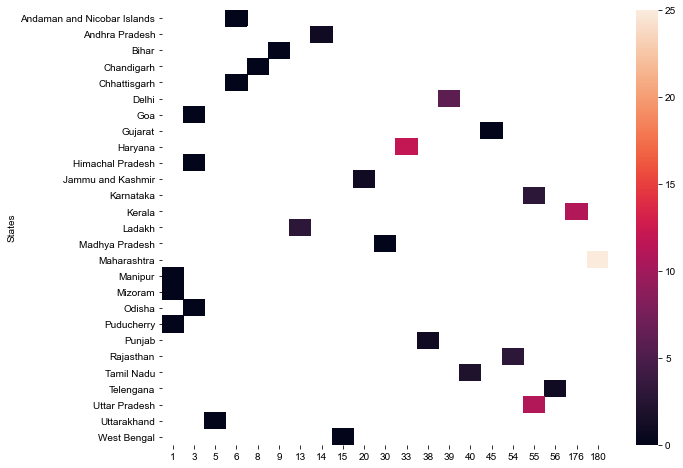

In [20]:
#Total cases vs Cured 
plt.figure(figsize=(10,8))
sns.heatmap(df[9].pivot_table(index='States',columns=pd.Series(total_cases), values='Cured'))
sns.set_context('notebook')
sns.set_style('ticks')

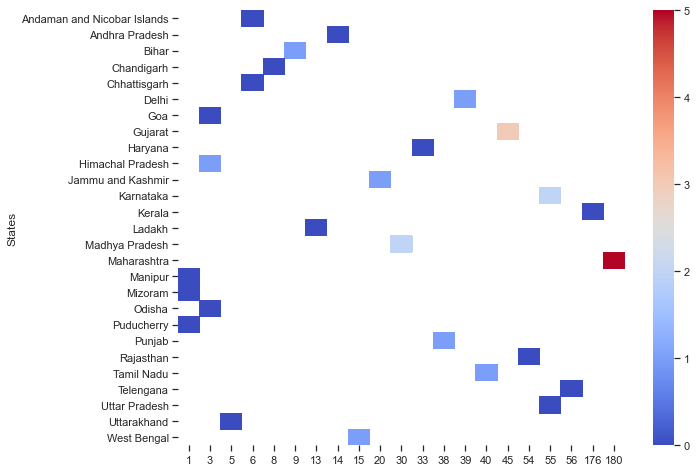

In [21]:
#Total cases vs Deaths
plt.figure(figsize=(10,8))
matrix_data=df[9].pivot_table(index='States',columns=pd.Series(total_cases), values='Death')
sns.heatmap(matrix_data,cmap='coolwarm')
sns.set_context('notebook')
sns.set_style('ticks')

In [22]:
#Surface plot between Total cases , Cured and Deaths
df2=pd.DataFrame({'Total Cases':pd.Series(total_cases),'Cured':df[9]['Cured'],'Death':df[9]['Death']})
df2.iplot(kind='surface',colorscale='rdylbu')

In [23]:
#South North East West
south=[]
north=[]
west=[]
east=[]
cur_s=[]
temp=[]
temp=df[9]['States']
for i in range (len(temp)):
    if temp[i]== 'Andhra Pradesh' or temp[i]=='Karnataka' or temp[i]=='Kerala' or temp[i]=='Maharashtra' or temp[i]=='Goa' or temp[i]=='Puducherry' or temp[i]=='Tamil Nadu' or temp[i]=='Telengana':
        south.append(temp[i])
        cur_s.append(df[9]['Cured'])
    if temp[i]== 'Bihar' or temp[i]=='Chhattisgarh' or temp[i]=='Chandigarh' or temp[i]=='Delhi' or temp[i]=='Haryana' or temp[i]=='Himachal Pradesh' or temp[i]=='Madhya Pradesh' or temp[i]=='Punjab' or temp[i]=='Chandigarh' or temp[i]=='Jammu and Kashmir' or temp[i]=='Ladakh' or temp[i]=='Uttar Pradesh' or temp[i]=='Uttarakhand':
        north.append(temp[i])
    if temp[i]== 'Gujarat' or temp[i]=='Rajasthan':
        west.append(temp[i])
    if temp[i]== 'Manipur' or temp[i]=='Mizoram' or temp[i]=='Odisha' or temp[i]=='West Bengal' or temp[i]=='Andaman and Nicobar Islands':
        east.append(temp[i])
#pd.Series(south)
#pd.Series(north)
#pd.Series(west)
#pd.Series(east)
#print(len(south)+len(west)+len(north)+len(east))
#pd.Series(cur_s)

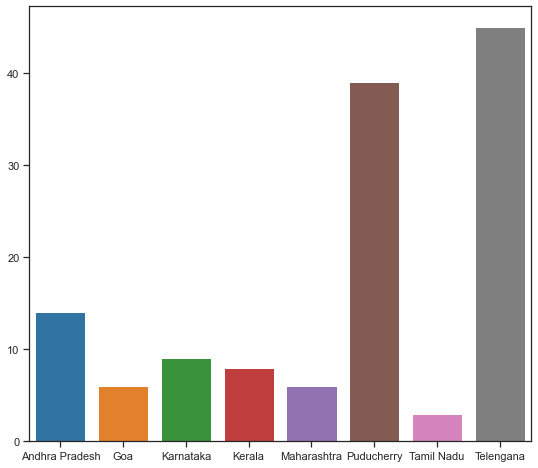

In [24]:
#South Indian Analysis:
plt.figure(figsize=(9,8))
sns.barplot(x=pd.Series(south), y=pd.Series(total_cases), data=df[9])
sns.set_context('notebook')
sns.set_style('darkgrid')

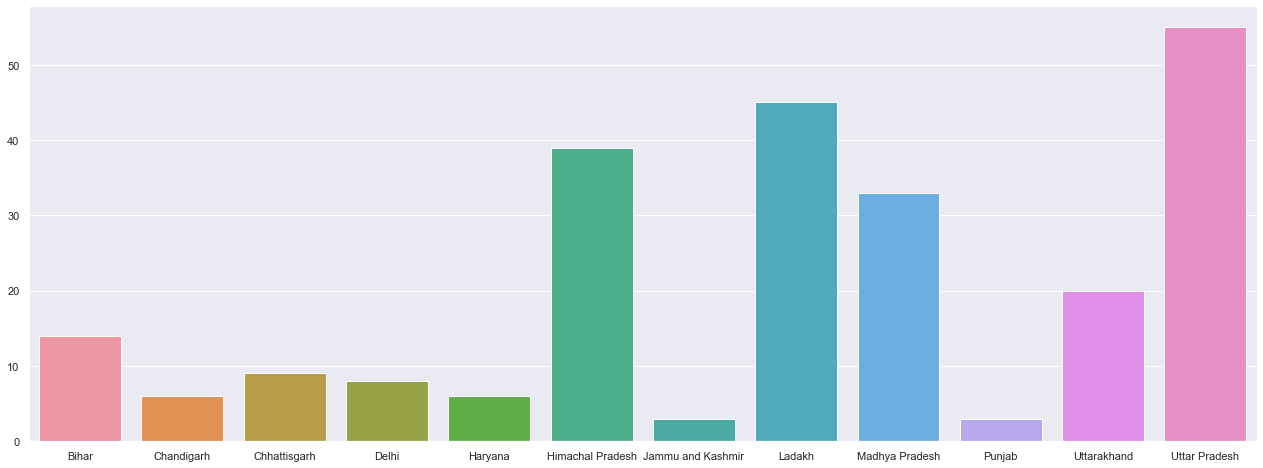

In [25]:
#North Indian Analysis:
plt.figure(figsize=(22,8))
sns.barplot(x=pd.Series(north), y=pd.Series(total_cases), data=df[9])
sns.set_context('notebook')
sns.set_style('darkgrid')

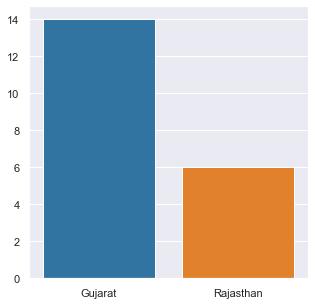

In [26]:
#West Indian Analysis:
plt.figure(figsize=(5,5))
sns.barplot(x=pd.Series(west), y=pd.Series(total_cases), data=df[9])
sns.set_context('notebook')

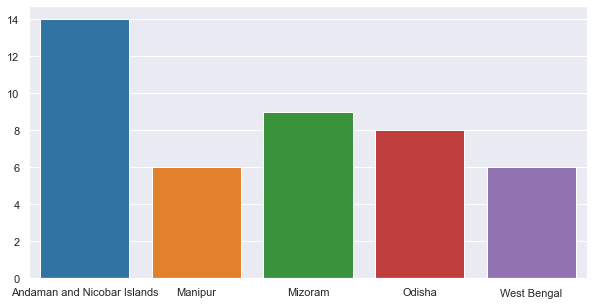

In [27]:
#East Indian Analysis:
plt.figure(figsize=(10,5))
sns.barplot(x=pd.Series(east), y=pd.Series(total_cases), data=df[9])
sns.set_context('notebook')

In [28]:
#Retrieving the Cured and Death of 4 parts of india
w1=df[9][(df[9].States.isin(['Rajasthan','Gujarat']))][['Indian Confirmed cases','Foreign National Confirmed cases','Cured','Death']]
e1=df[9][(df[9].States.isin(['Manipur','Mizoram','Odisha','West Bengal','Andaman and Nicobar Islands']))][['Indian Confirmed cases','Foreign National Confirmed cases','Cured','Death']]
s1=df[9][(df[9].States.isin(['Andhra Pradesh','Karnataka','Kerala','Maharashtra','Goa','Puducherry','Tamil Nadu','Telengana'
]))][['Indian Confirmed cases','Foreign National Confirmed cases','Cured','Death']]
n1=df[9][(df[9].States.isin(['Bihar','Chhattisgarh','Chandigarh','Delhi','Haryana','Himachal Pradesh','Madhya Pradesh','Punjab','Chandigarh','Jammu and Kashmir','Ladakh','Uttar Pradesh','Uttarakhand'
]))][['Indian Confirmed cases','Foreign National Confirmed cases','Cured','Death']]

In [47]:
n1.iplot(title='North Indian Cases')
s1.iplot(title='South Indian Cases')


In [48]:
e1.iplot(title='East Indian Cases')
w1.iplot(title='West Indian Cases')

In [86]:
#Indian vs Foreign Cases Region wise:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=s1['Indian Confirmed cases'],
    x=s1['Foreign National Confirmed cases'],
    name='South',
    
))
fig.add_trace(go.Bar(
    y=n1['Indian Confirmed cases'],
    x=n1['Foreign National Confirmed cases'],
    name='North',
    
))
fig.add_trace(go.Bar(
    y=w1['Indian Confirmed cases'],
    x=w1['Foreign National Confirmed cases'],
    name='West',
    
))
fig.add_trace(go.Bar(
    y=e1['Indian Confirmed cases'],
    x=e1['Foreign National Confirmed cases'],
    name='East',
    
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=45)
fig.show()